In [1]:
# Update sklearn to prevent version mismatches
#!pip install sklearn --upgrade

In [2]:
# install joblib. This will be used to save your model. 
# Restart your kernel after installing 
#!pip install joblib

In [3]:
import pandas as pd #data processing
import numpy as np #linear algebra

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
import matplotlib.patches as patches

from plotly import tools, subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
py.init_notebook_mode(connected=True)
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

# Read the CSV and Perform Basic Data Cleaning

In [4]:
df = pd.read_csv("diagnosis-of-covid-19-and-its-clinical-spectrum.csv")
# Drop the null columns where all values are null
# df = df.dropna(axis='columns', how='all')
# Drop the null rows
# df = df.dropna()
df.columns = [x.lower().strip().replace(' ','_') for x in df.columns]

In [5]:
print('Size of the data', df.shape)

Size of the data (5644, 111)


In [6]:
df.columns.values

array(['patient_id', 'patient_age_quantile', 'sars_cov_2_exam_result',
       'patient_addmited_to_regular_ward_1_yes_0_no',
       'patient_addmited_to_semi_intensive_unit_1_yes_0_no',
       'patient_addmited_to_intensive_care_unit_1_yes_0_no', 'hematocrit',
       'hemoglobin', 'platelets', 'mean_platelet_volume',
       'red_blood_cells', 'lymphocytes',
       'mean_corpuscular_hemoglobin_concentration_mchc', 'leukocytes',
       'basophils', 'mean_corpuscular_hemoglobin_mch', 'eosinophils',
       'mean_corpuscular_volume_mcv', 'monocytes',
       'red_blood_cell_distribution_width_rdw', 'serum_glucose',
       'respiratory_syncytial_virus', 'influenza_a', 'influenza_b',
       'parainfluenza_1', 'coronavirusnl63', 'rhinovirus_enterovirus',
       'mycoplasma_pneumoniae', 'coronavirus_hku1', 'parainfluenza_3',
       'chlamydophila_pneumoniae', 'adenovirus', 'parainfluenza_4',
       'coronavirus229e', 'coronavirusoc43', 'inf_a_h1n1_2009',
       'bordetella_pertussis', 'metapneum

In [7]:
df.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus_enterovirus,mycoplasma_pneumoniae,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,influenza_b_rapid_test,influenza_a_rapid_test,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,strepto_a,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,fio2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,myeloblasts,urine_esterase,urine_aspect,urine_ph,urine_hemoglobin,urine_bile_pigments,urine_ketone_bodies,urine_nitrite,urine_density,urine_urobilinogen,urine_protein,urine_sugar,urine_leukocytes,urine_crystals,urine_red_blood_cells,urine_hyaline_cylinders,urine_granular_cylinders,urine_yeasts,urine_color,partial_thromboplastin_time_ptt,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,prothrombin_time_pt_activity,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,lipase_dosage,d_dimer,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,44477f75e8169d2,13,negative,f,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,f,f,f,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,not_detected,not_detected,not_detected,not_detected,not_detected,detected,NaN,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,not_detected,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,negative,negative,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,f,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,f,f,f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [8]:
#transform target variable into numeric 

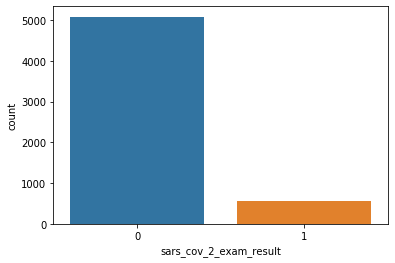

In [9]:
df['sars_cov_2_exam_result'] = df['sars_cov_2_exam_result'].replace(['negative','positive'], [0,1])
sns.countplot(df['sars_cov_2_exam_result'])

In [10]:
print("There are {}% target values with 1".format(100 *df['sars_cov_2_exam_result'].value_counts()[1]/df.shape[0]))

There are 9.886605244507441% target values with 1


In [11]:
## Examine missing values
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [12]:
missing_data(df)

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus_enterovirus,mycoplasma_pneumoniae,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,influenza_b_rapid_test,influenza_a_rapid_test,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,strepto_a,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,fio2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,myeloblasts,urine_esterase,urine_aspect,urine_ph,urine_hemoglobin,urine_bile_pigments,urine_ketone_bodies,urine_nitrite,urine_density,urine_urobilinogen,urine_protein,urine_sugar,urine_leukocytes,urine_crystals,urine_red_blood_cells,urine_hyaline_cylinders,urine_granular_cylinders,urine_yeasts,urine_color,partial_thromboplastin_time_ptt,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,prothrombin_time_pt_activity,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,lipase_dosage,d_dimer,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
Total,0,0,0,0,0,0,5041,5041,5042,5045,5042,5042,5042,5042,5042,5042,5042,5042,5043,5042,5436,4290,4290,4290,4292,4292,4292,5644,4292,4292,4292,4292,4292,4292,4292,4292,4292,4292,4292,5131,5247,5138,5220,5273,5274,4824,4824,5419,5418,5491,5462,5462,5462,5500,5594,5312,5604,5508,5508,5508,5508,5643,5508,5508,5508,5547,5547,5547,5547,5547,5547,5584,5574,5574,5574,5574,5587,5643,5574,5575,5584,5644,5574,5574,5574,5577,5575,5574,5574,5644,5553,5511,5543,5644,5641,5540,5621,5617,5636,5644,5631,5617,5617,5617,5617,5617,5617,5617,5624,5624,5617
Percent,0,0,0,0,0,0,89.3161,89.3161,89.3338,89.387,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3338,89.3515,89.3338,96.3147,76.0099,76.0099,76.0099,76.0454,76.0454,76.0454,100,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,76.0454,90.9107,92.966,91.0347,92.4876,93.4266,93.4444,85.4713,85.4713,96.0135,95.9957,97.2892,96.7753,96.7753,96.7753,97.4486,99.1141,94.1176,99.2913,97.5904,97.5904,97.5904,97.5904,99.9823,97.5904,97.5904,97.5904,98.2814,98.2814,98.2814,98.2814,98.2814,98.2814,98.9369,98.7597,98.7597,98.7597,98.7597,98.9901,99.9823,98.7597,98.7775,98.9369,100,98.7597,98.7597,98.7597,98.8129,98.7775,98.7597,98.7597,100,98.3877,97.6435,98.2105,100,99.9468,98.1573,99.5925,99.5216,99.8583,100,99.7697,99.5216,99.5216,99.5216,99.5216,99.5216,99.5216,99.5216,99.6456,99.6456,99.5216
Types,object,int64,int64,object,object,object,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,object,object,object,object,object,float64,object,object,object,object,object,object,object,object,object,object,object,float64,float64,float64,float64,float64,float64,object,object

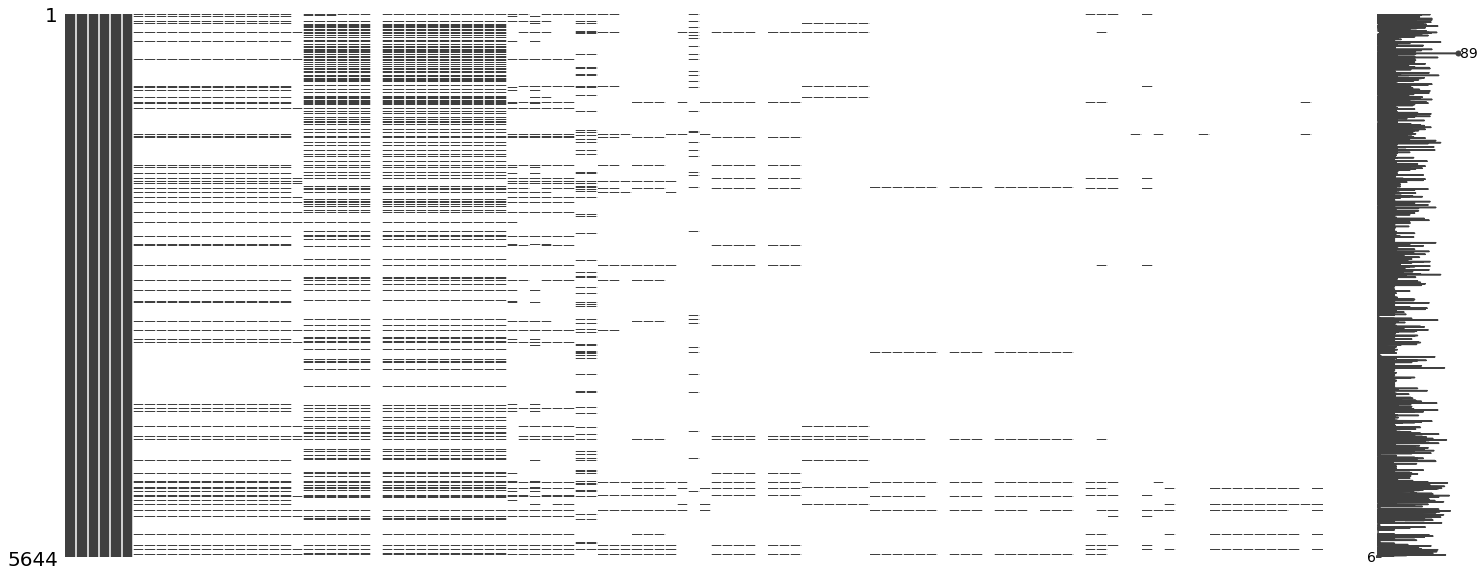

In [13]:
## Handling missing values 
#!pip install quilt
import missingno as msno
#The msno.matrix nullity matrix is a data-dense display which lets you quickly visually analyse data completion.
msno.matrix(df.head(20000))

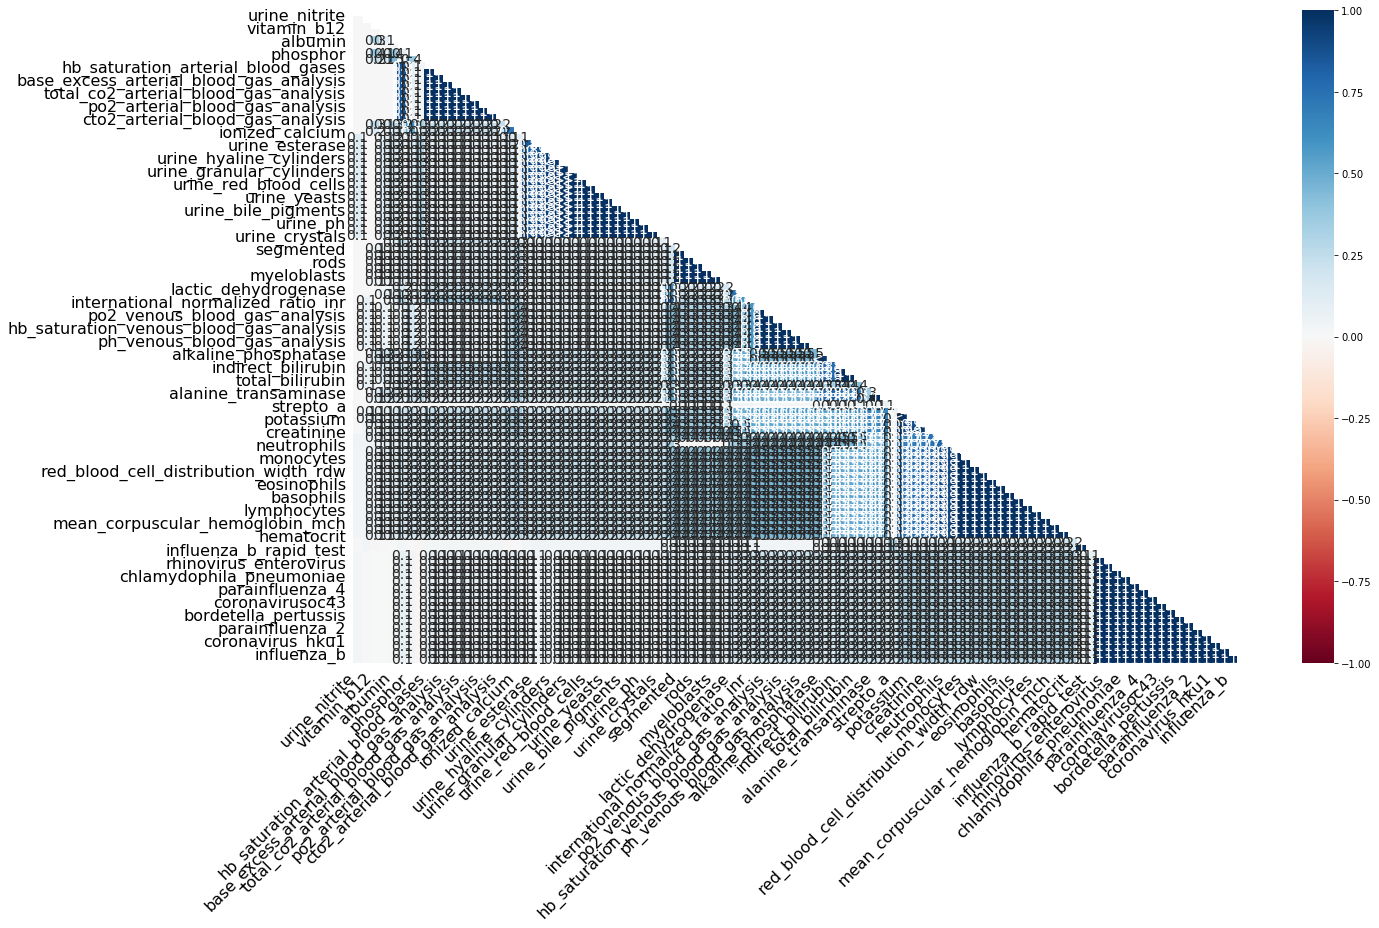

In [14]:
#The missingno correlation heatmap measures nullity correlation: 
#how strongly the presence or absence of one variable affects the presence of another:

a = msno.heatmap(df, sort='ascending')
a


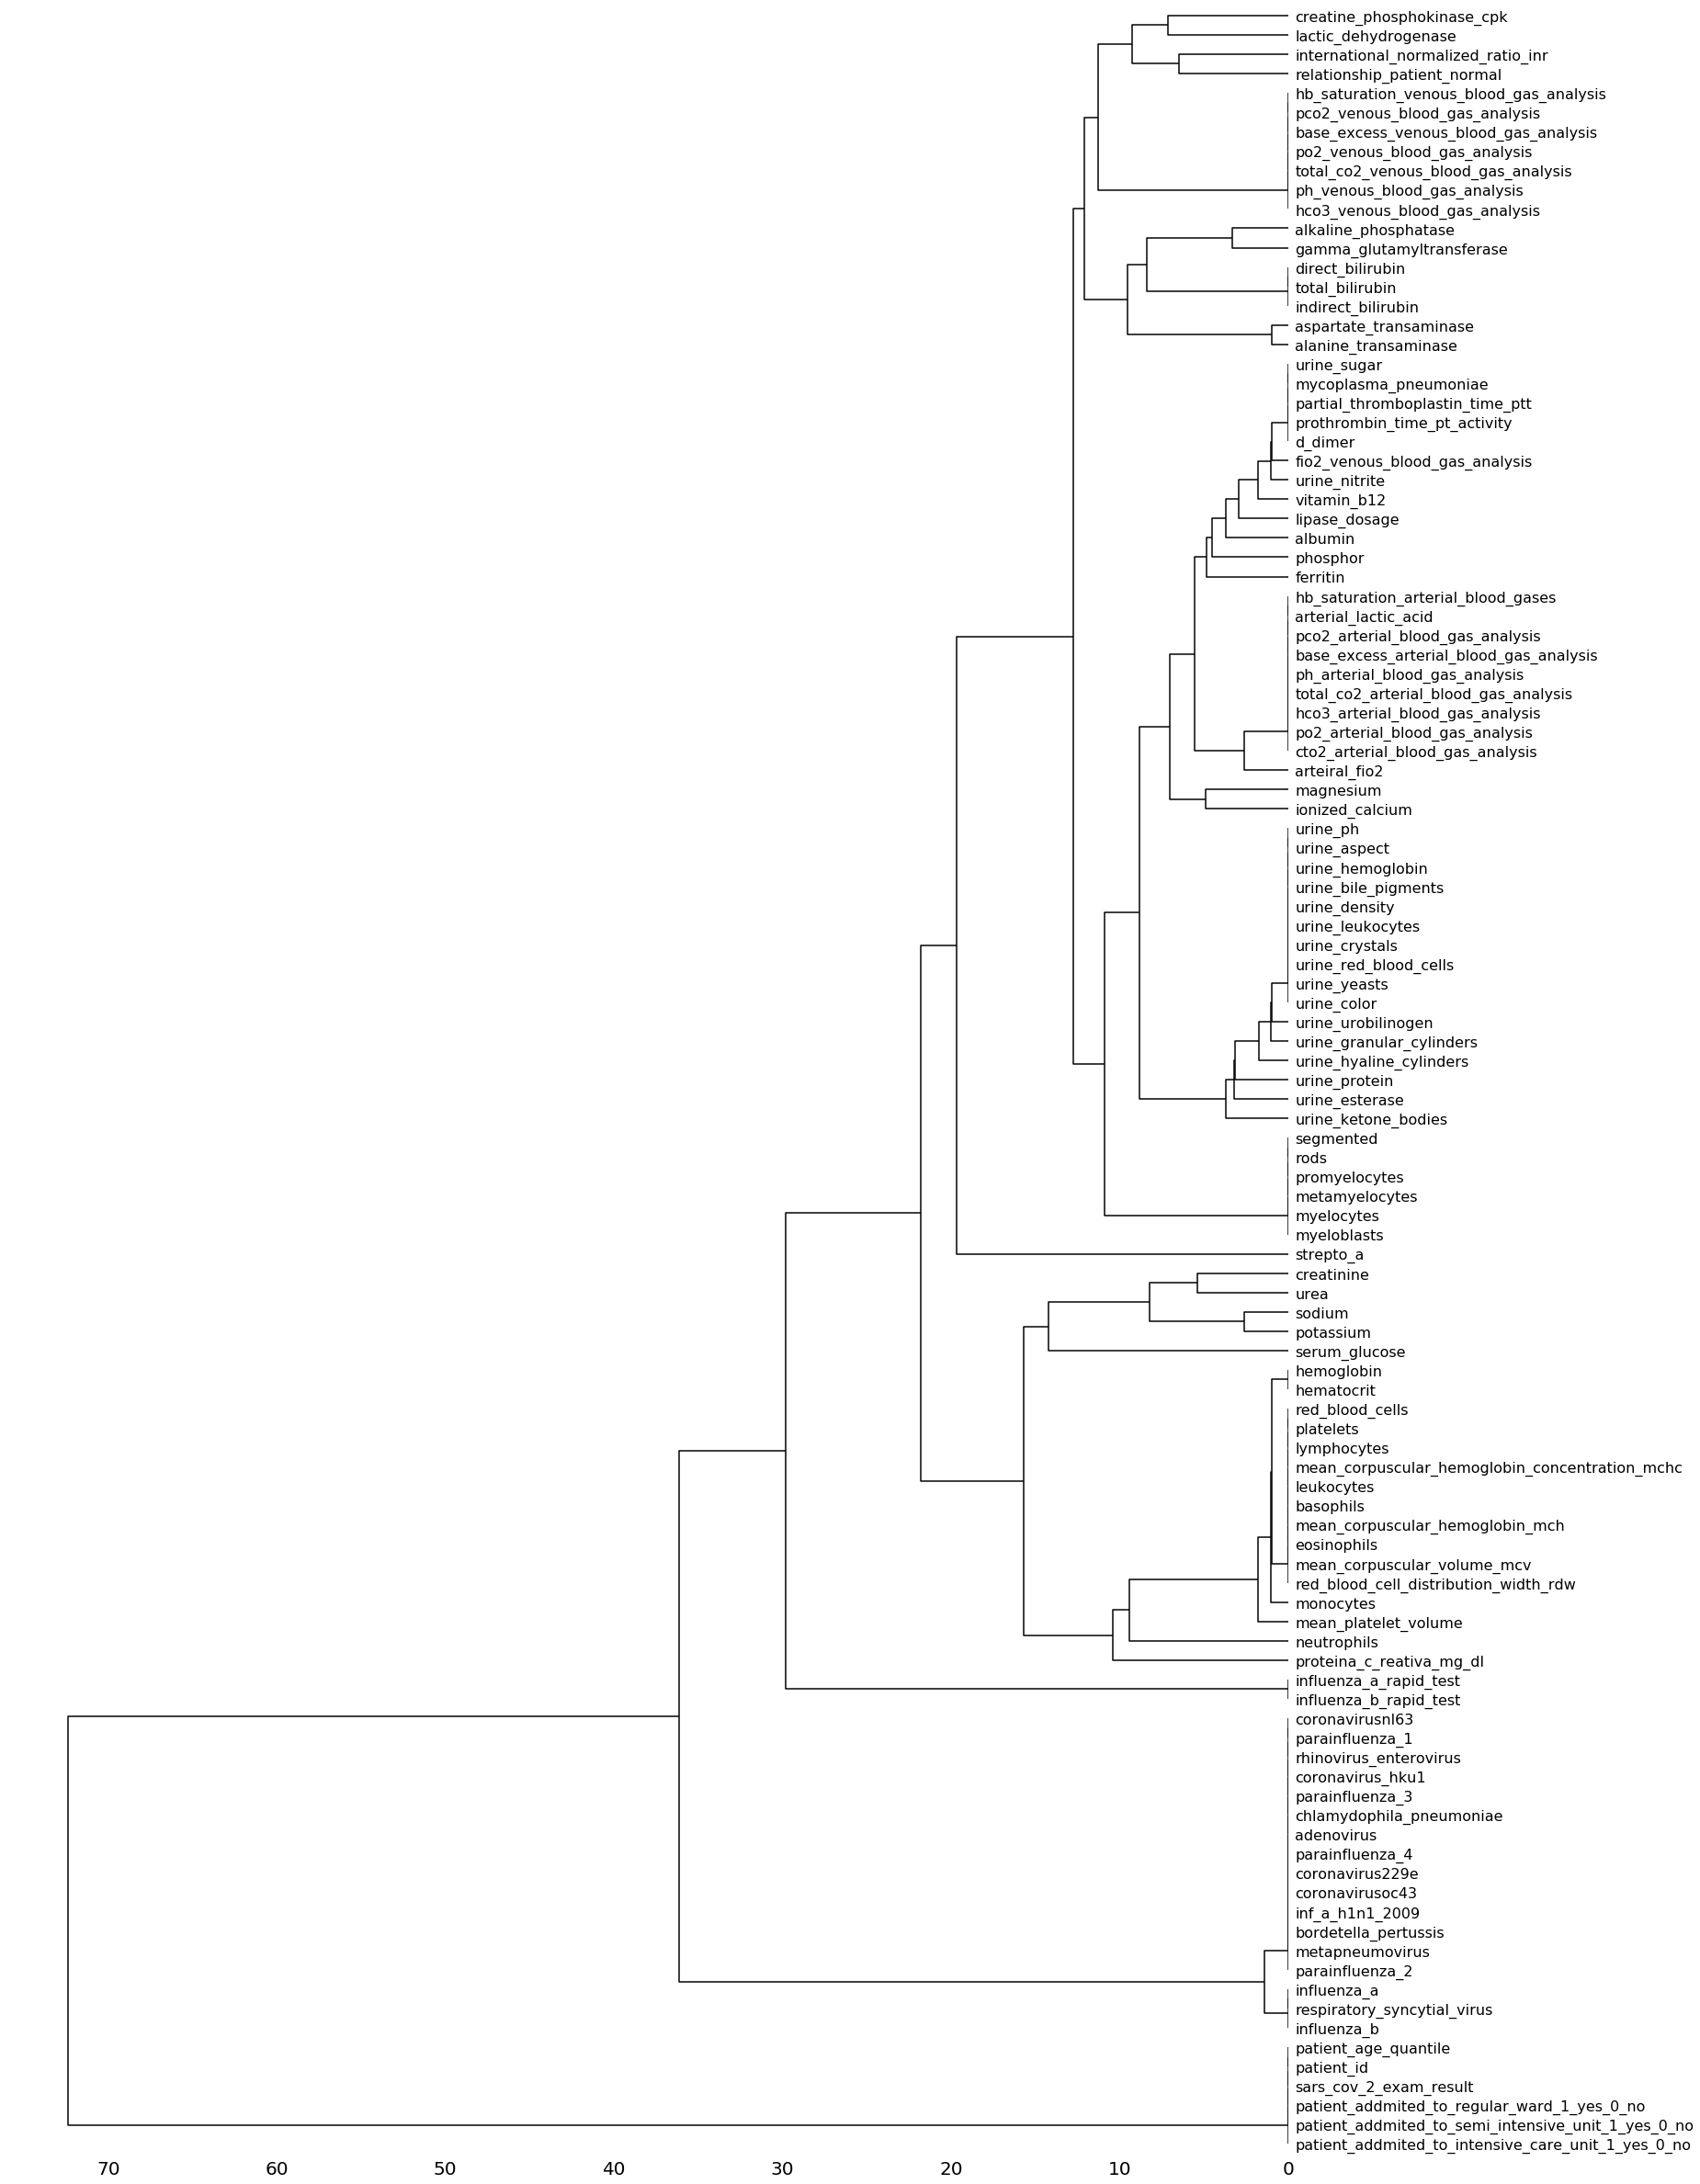

In [15]:
#The dendrogram allows you to more fully correlate variable completion, 
#revealing trends deeper than the pairwise ones visible in the correlation heatmap:

a2 = msno.dendrogram(df)
a2

In [16]:
# Number of each type of column
df.dtypes.value_counts()

float64    69
object     40
int64       2
dtype: int64

In [17]:
# Number of unique classes in each object column
df.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

patient_id                                            5644
patient_addmited_to_regular_ward_1_yes_0_no              2
patient_addmited_to_semi_intensive_unit_1_yes_0_no       2
patient_addmited_to_intensive_care_unit_1_yes_0_no       2
respiratory_syncytial_virus                              2
influenza_a                                              2
influenza_b                                              2
parainfluenza_1                                          2
coronavirusnl63                                          2
rhinovirus_enterovirus                                   2
coronavirus_hku1                                         2
parainfluenza_3                                          2
chlamydophila_pneumoniae                                 2
adenovirus                                               2
parainfluenza_4                                          2
coronavirus229e                                          2
coronavirusoc43                                         

In [18]:
#Now that we have dealt with the categorical variables and the outliers, let's continue with the EDA. One way to try and understand the data is by looking for correlations between the features and the target. We can calculate the Pearson correlation coefficient between every variable and the target using the .corr dataframe method.

#The correlation coefficient is not the greatest method to represent "relevance" of a feature, but it does give us an idea of possible relationships within the data. Some general interpretations of the absolute value of the correlation coefficent are:

#00-.19 “very weak”
#.20-.39 “weak”
#.40-.59 “moderate”
#.60-.79 “strong”
#.80-1.0 “very strong”

In [19]:
##Correlations
# Find correlations with the target and sort
correlations = df.corr()['sars_cov_2_exam_result'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))


Most Positive Correlations:
 segmented                           0.186514
lipase_dosage                       0.191942
monocytes                           0.197333
cto2_arterial_blood_gas_analysis    0.267457
po2_arterial_blood_gas_analysis     0.312537
ph_arterial_blood_gas_analysis      0.314820
sars_cov_2_exam_result              1.000000
mycoplasma_pneumoniae                    NaN
fio2_venous_blood_gas_analysis           NaN
urine_sugar                              NaN
partial_thromboplastin_time_ptt          NaN
prothrombin_time_pt_activity             NaN
vitamin_b12                              NaN
d_dimer                                  NaN
albumin                                  NaN
Name: sars_cov_2_exam_result, dtype: float64

Most Negative Correlations:
 pco2_arterial_blood_gas_analysis        -0.323977
arteiral_fio2                           -0.310583
ionized_calcium                         -0.305113
leukocytes                              -0.288508
platelets            

In [20]:
#first ten correlations between the features in dataset

features = df.columns.values[2:112]
corrs_ = df[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
corrs_ = corrs_[corrs_['level_0'] != corrs_['level_1']]
corrs_.head(10)

,level_0,level_1,0
0,promyelocytes,creatine_phosphokinase_cpk,4.372450e-18
1,creatine_phosphokinase_cpk,myelocytes,4.372450e-18
2,creatine_phosphokinase_cpk,promyelocytes,4.372450e-18
3,myelocytes,creatine_phosphokinase_cpk,4.372450e-18
4,promyelocytes,alkaline_phosphatase,5.546220e-18
5,alkaline_phosphatase,promyelocytes,5.546220e-18
6,myelocytes,lactic_dehydrogenase,1.121091e-17
7,lactic_dehydrogenase,myelocytes,1.121091e-17
8,creatine_phosphokinase_cpk,metamyelocytes,1.311735e-17
9,metamyelocytes,creatine_phosphokinase_cpk,1.311735e-17


In [21]:
corrs_.tail(10)

,level_0,level_1,0
4890,cto2_arterial_blood_gas_analysis,fio2_venous_blood_gas_analysis,NaN
4891,cto2_arterial_blood_gas_analysis,promyelocytes,NaN
4892,cto2_arterial_blood_gas_analysis,urine_sugar,NaN
4893,cto2_arterial_blood_gas_analysis,partial_thromboplastin_time_ptt,NaN
4894,cto2_arterial_blood_gas_analysis,prothrombin_time_pt_activity,NaN
4895,cto2_arterial_blood_gas_analysis,vitamin_b12,NaN
4896,cto2_arterial_blood_gas_analysis,ferritin,NaN
4897,cto2_arterial_blood_gas_analysis,lipase_dosage,NaN
4898,cto2_arterial_blood_gas_analysis,d_dimer,NaN
4899,cto2_arterial_blood_gas_analysis,albumin,NaN


In [22]:
#The correlation between the features is small

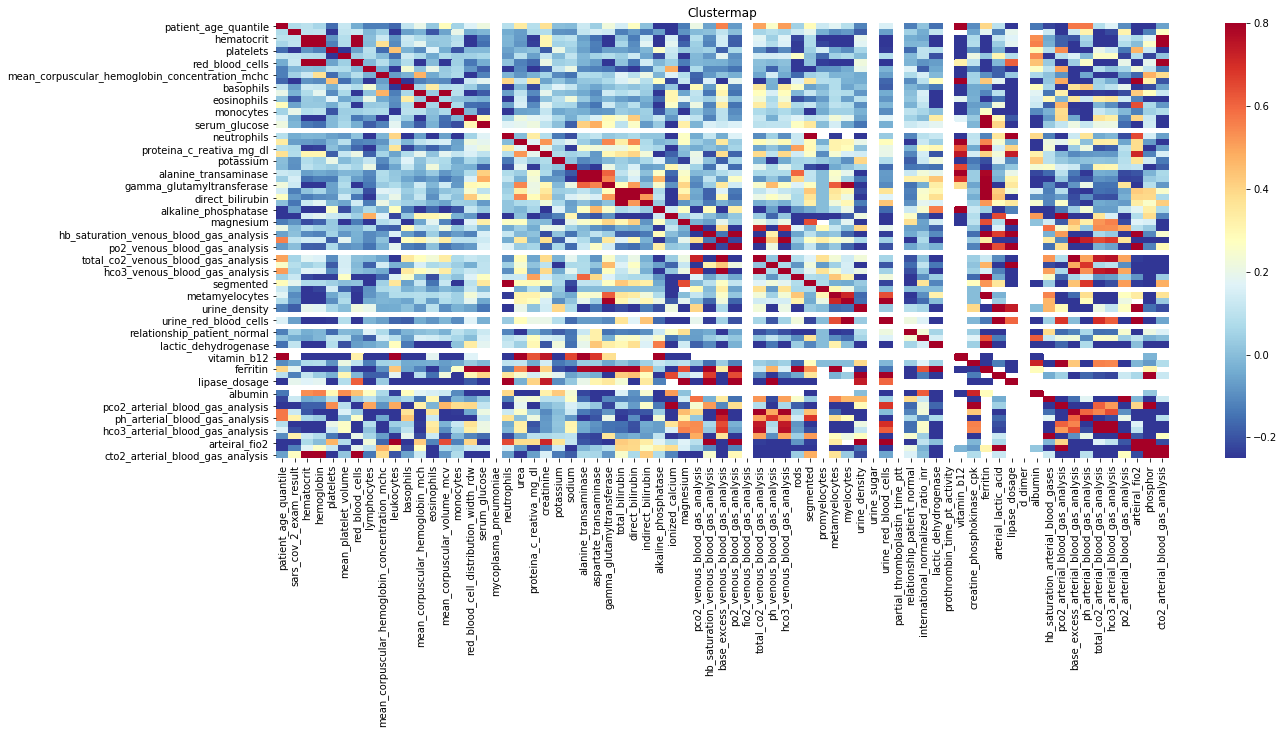

In [23]:
#Correlations clustermap
corrs = df.corr()
plt.figure(figsize = (20, 8))
# Heatmap of correlations
sns.heatmap(corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = False, vmax = 0.8)
plt.title('Clustermap');

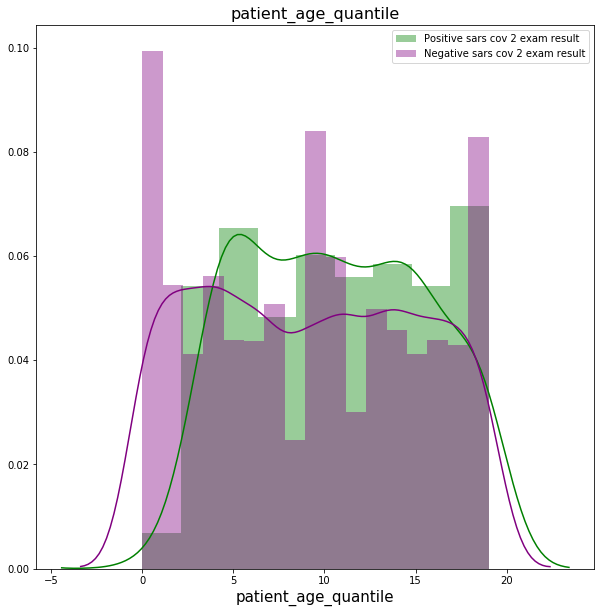

In [24]:
#make some visuals
def plot_dist_col(column):
    pos__df = df[df['sars_cov_2_exam_result'] ==1]
    neg__df = df[df['sars_cov_2_exam_result'] ==0]

    '''plot dist curves for train and test weather data for the given column name'''
    fig, ax = plt.subplots(figsize=(10, 10))
    sns.distplot(pos__df[column].dropna(), color='green', ax=ax).set_title(column, fontsize=16)
    sns.distplot(neg__df[column].dropna(), color='purple', ax=ax).set_title(column, fontsize=16)
    plt.xlabel(column, fontsize=15)
    plt.legend(['Positive sars cov 2 exam result', 'Negative sars cov 2 exam result'])
    plt.show()
plot_dist_col('patient_age_quantile')

In [25]:
fig = px.pie( values=df.groupby(['sars_cov_2_exam_result']).size().values,names=df.groupby(['sars_cov_2_exam_result']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="black" ) )   
py.iplot(fig)



In [26]:
from sklearn import preprocessing
#Encoding variables: find a way to encode (represent) these variables as numbers before handing them off to the model

#fill in mean for floats
for c in df.columns:
    if df[c].dtype=='float16' or  df[c].dtype=='float32' or  df[c].dtype=='float64':
        df[c].fillna(df[c].mean())

#fill in -999 for categoricals
df = df.fillna(-999)
# Label Encoding
for f in df.columns:
    if df[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[f].values))
        df[f] = lbl.transform(list(df[f].values))
        
print('Labelling done.')  

Labelling done.


In [27]:
##feature selection 
## Find the optimal feature subset using an evaluation measure. 
#The choice of evaluation metric distinguish the three main strategies 
#of feature selection algorithms: the wrapper strategy, the filter 
#strategy, and the embedded strategy

#Filter methods:

#information gain
#chi-square test
#correlation coefficient
#variance threshold

#Wrapper methods:
#recursive feature elimination
#sequential feature selection algorithms

#Embedded methods:
#L1 (LASSO) regularization
#decision tree

In [28]:
#In our case, we remove some useless, redundant variables. 
#We will use three methods for feature selection: 
#Remove collinear features, remove features with greater than a 
#threshold percentage of missing values, keep only the most relevant 
#features using feature importances from a model

In [29]:
#remove collinear varialbe: variables that highly correlated to one another 
#can decrease model's availability to learn, decrease model interpretability and 
#decrease generalization performance on the test set

# Threshold for removing correlated variables
threshold = 0.92

# Absolute value correlation matrix
corr_matrix = df.corr().abs()
corr_matrix.head()
# Upper triangle of correlations
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus_enterovirus,mycoplasma_pneumoniae,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,influenza_b_rapid_test,influenza_a_rapid_test,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,strepto_a,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,fio2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,myeloblasts,urine_esterase,urine_aspect,urine_ph,urine_hemoglobin,urine_bile_pigments,urine_ketone_bodies,urine_nitrite,urine_density,urine_urobilinogen,urine_protein,urine_sugar,urine_leukocytes,urine_crystals,urine_red_blood_cells,urine_hyaline_cylinders,urine_granular_cylinders,urine_yeasts,urine_color,partial_thromboplastin_time_ptt,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,prothrombin_time_pt_activity,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,lipase_dosage,d_dimer,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
patient_id,NaN,0.014136,0.018664,0.003748,0.004803,0.000162,0.002173,0.002167,0.001974,0.002017,0.001993,0.001987,0.001965,0.001963,0.001982,0.001986,0.001994,0.001997,0.002886,0.001990,0.003019,0.003093,0.003210,0.004073,0.004184,0.001755,0.008048,NaN,0.003829,0.005378,0.004730,0.003409,0.004724,0.003164,0.003991,0.006590,0.004026,0.004800,0.004472,0.000498,0.003959,0.000623,0.006083,0.002802,0.001500,0.015878,0.018408,0.003397,0.004314,0.003070,0.018474,0.018485,0.018470,0.002834,0.015135,0.017803,0.005460,0.011408,0.011389,0.011402,0.011383,0.012268,0.011407,0.011392,0.011407,0.007207,0.007222,0.007189,0.007210,0.007201,0.007206,0.014501,0.016011,0.017005,0.013409,0.017971,0.008254,0.004555,0.018895,0.015596,0.018324,NaN,0.018100,0.019843,0.018904,0.020732,0.021325,0.018901,0.018446,NaN,0.001224,0.009923,0.011182,NaN,0.002073,0.004570,0.010426,0.002842,0.010422,NaN,0.005787,0.002856,0.002832,0.002847,0.002854,0.002839,0.002840,0.002850,0.005929,0.007077,0.002847
patient_age_quantile,NaN,NaN,0.075244,0.046166,0.015736,0.035772,0.109140,0.109128,0.109860,0.107703,0.109901,0.109871,0.109871,0.109857,0.109951,0.109981,0.109921,0.110010,0.110938,0.109971,0.086764,0.004644,0.018124,0.010242,0.017652,0.018663,0.001011,NaN,0.018832,0.018431,0.017502,0.013473,0.014038,0.017466,0.017221,0.011411,0.016905,0.016024,0.017278,0.128227,0.112175,0.108975,0.116449,0.109506,0.110053,0.130636,0.133817,0.066391,0.066337,0.047117,0.084755,0.084779,0.084729,0.046623,0.031407,0.141642,0.056384,0.068172,0.068125,0.068235,0.068123,0.020004,0.068225,0.068181,0.068227,0.007516,0.007478,0.007503,0.007495,0.007509,0.007524,0.011549,0.007090,0.000529,0.020280,0.015301,0.029753,0.015396,0.013760,0.015766,0.006880,NaN,0.016582,0.00014

In [30]:
# Select columns with correlations above threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print('There are %d columns to remove.' % (len(to_drop)))
dataset = df.drop(columns = to_drop)
print('Data shape: ', dataset.shape)
print('Size of the data', dataset.shape)

There are 64 columns to remove.
Data shape:  (5644, 47)
Size of the data (5644, 47)


In [31]:
to_drop

['hemoglobin',
 'platelets',
 'mean_platelet_volume',
 'red_blood_cells',
 'lymphocytes',
 'mean_corpuscular_hemoglobin_concentration_mchc',
 'leukocytes',
 'basophils',
 'mean_corpuscular_hemoglobin_mch',
 'eosinophils',
 'mean_corpuscular_volume_mcv',
 'monocytes',
 'red_blood_cell_distribution_width_rdw',
 'influenza_a',
 'influenza_b',
 'parainfluenza_1',
 'coronavirusnl63',
 'rhinovirus_enterovirus',
 'coronavirus_hku1',
 'parainfluenza_3',
 'chlamydophila_pneumoniae',
 'adenovirus',
 'parainfluenza_4',
 'coronavirus229e',
 'coronavirusoc43',
 'inf_a_h1n1_2009',
 'bordetella_pertussis',
 'metapneumovirus',
 'parainfluenza_2',
 'creatinine',
 'sodium',
 'influenza_a_rapid_test',
 'aspartate_transaminase',
 'direct_bilirubin',
 'indirect_bilirubin',
 'alkaline_phosphatase',
 'hb_saturation_venous_blood_gas_analysis',
 'base_excess_venous_blood_gas_analysis',
 'po2_venous_blood_gas_analysis',
 'total_co2_venous_blood_gas_analysis',
 'ph_venous_blood_gas_analysis',
 'hco3_venous_blood

In [32]:
#remove missing values
#dataset missing values (in percent)
dataset_missing = (dataset.isnull().sum() / len(dataset)).sort_values(ascending = False)
dataset_missing.head()

phosphor           0.0
urea               0.0
magnesium          0.0
strepto_a          0.0
ionized_calcium    0.0
dtype: float64

In [33]:
#identify missing values above threshold
dataset_missing_ = dataset_missing.index[dataset_missing > 0.85]

all_missing = list(set(dataset_missing_))
print('There are %d columns with more than 85%% missing values' % len(all_missing))
dataset = dataset.drop(columns = all_missing)
print('Data shape: ', dataset.shape)

There are 0 columns with more than 85% missing values
Data shape:  (5644, 47)


In [34]:
#feature selection through feature importance
cat_features = [i for i in dataset.columns if str(dataset[i].dtype) in ['object', 'category']]

if len(cat_features) > 0:
    dataset[cat_features] = dataset[cat_features].astype('category')


df_lgb = dataset.copy()
for i in cat_features:
    df_lgb[i] = dataset[i].cat.codes

df_lgb.columns = ["".join (c if c.isalnum() else "_" for c in str(x)) for x in df_lgb.columns]

dataset_labels = df_lgb['sars_cov_2_exam_result']
df_lgb_ = df_lgb.copy()
df_lgb = df_lgb.drop(['patient_id', 
                      'sars_cov_2_exam_result', 
                      'patient_addmited_to_regular_ward_1_yes_0_no',
                      'patient_addmited_to_semi_intensive_unit_1_yes_0_no',
                      'patient_addmited_to_intensive_care_unit_1_yes_0_no'
                ], axis=1)
x = df_lgb.copy()

In [35]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
# Initialize an empty array to hold feature importances
feature_importances = np.zeros(df_lgb.shape[1])

# Create the model with several hyperparameters
model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 5000, class_weight = 'balanced')

# Fit the model twice to avoid overfitting
for i in range(2):
    # Split into training and validation set
    dataset_features, valid_features, dataset_features_y, valid_y = train_test_split(x, dataset_labels, test_size = 0.20, random_state = i)
    
    # Train using early stopping
    model.fit(dataset_features, dataset_features_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
              eval_metric = 'auc', verbose = 200)
    
    # Record the feature importances
    feature_importances += model.feature_importances_

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[25]	valid_0's auc: 0.649972	valid_0's binary_logloss: 0.610572
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[10]	valid_0's auc: 0.603197	valid_0's binary_logloss: 0.643876


In [36]:
#average feature importances! 
feature_importances = feature_importances / 2
feature_importances = pd.DataFrame({'feature': list(df_lgb.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
feature_importances.head()

,feature,importance
0,patient_age_quantile,276.5
5,neutrophils,45.5
7,proteina_c_reativa_mg_dl,33.5
1,hematocrit,29.0
3,respiratory_syncytial_virus,26.5


In [37]:
# Find the features with zero importance
zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
print('There are %d features with 0.0 importance' % len(zero_features))
feature_importances.tail()

There are 21 features with 0.0 importance


,feature,importance
19,urine_esterase,0.0
17,fio2_venous_blood_gas_analysis,0.0
15,magnesium,0.0
4,mycoplasma_pneumoniae,0.0
41,phosphor,0.0


In [38]:
def plot_feature_importances(df, threshold = 0.9):
    """
    Plots 15 most important features and the cumulative importance of features.
    Prints the number of features needed to reach threshold cumulative importance.
    
    Parameters
    --------
    df : dataframe
        Dataframe of feature importances. Columns must be feature and importance
    threshold : float, default = 0.9
        Threshold for prining information about cumulative importances
        
    Return
    --------
    df : dataframe
        Dataframe ordered by feature importances with a normalized column (sums to 1)
        and a cumulative importance column
    
    """
    
    plt.rcParams['font.size'] = 18
    
    # Sort features according to importance
    df = df.sort_values('importance', ascending = False).reset_index()
    
    # Normalize the feature importances to add up to one
    df['importance_normalized'] = df['importance'] / df['importance'].sum()
    df['cumulative_importance'] = np.cumsum(df['importance_normalized'])

    # Make a horizontal bar chart of feature importances
    plt.figure(figsize = (10, 6))
    ax = plt.subplot()
    
    # Need to reverse the index to plot most important on top
    ax.barh(list(reversed(list(df.index[:15]))), 
            df['importance_normalized'].head(15), 
            align = 'center', edgecolor = 'k')
    
    # Set the yticks and labels
    ax.set_yticks(list(reversed(list(df.index[:15]))))
    ax.set_yticklabels(df['feature'].head(15))
    
    # Plot labeling
    plt.xlabel('Normalized Importance'); plt.title('Feature Importances')
    plt.show()
    
    # Cumulative importance plot
    plt.figure(figsize = (8, 6))
    plt.plot(list(range(len(df))), df['cumulative_importance'], 'r-')
    plt.xlabel('Number of Features'); plt.ylabel('Cumulative Importance'); 
    plt.title('Cumulative Feature Importance');
    plt.show();
    
    importance_index = np.min(np.where(df['cumulative_importance'] > threshold))
    print('%d features required for %0.2f of cumulative importance' % (importance_index + 1, threshold))
    
    return df

In [39]:
df.head()

,patient_id,patient_age_quantile,sars_cov_2_exam_result,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_addmited_to_intensive_care_unit_1_yes_0_no,hematocrit,hemoglobin,platelets,mean_platelet_volume,red_blood_cells,lymphocytes,mean_corpuscular_hemoglobin_concentration_mchc,leukocytes,basophils,mean_corpuscular_hemoglobin_mch,eosinophils,mean_corpuscular_volume_mcv,monocytes,red_blood_cell_distribution_width_rdw,serum_glucose,respiratory_syncytial_virus,influenza_a,influenza_b,parainfluenza_1,coronavirusnl63,rhinovirus_enterovirus,mycoplasma_pneumoniae,coronavirus_hku1,parainfluenza_3,chlamydophila_pneumoniae,adenovirus,parainfluenza_4,coronavirus229e,coronavirusoc43,inf_a_h1n1_2009,bordetella_pertussis,metapneumovirus,parainfluenza_2,neutrophils,urea,proteina_c_reativa_mg_dl,creatinine,potassium,sodium,influenza_b_rapid_test,influenza_a_rapid_test,alanine_transaminase,aspartate_transaminase,gamma_glutamyltransferase,total_bilirubin,direct_bilirubin,indirect_bilirubin,alkaline_phosphatase,ionized_calcium,strepto_a,magnesium,pco2_venous_blood_gas_analysis,hb_saturation_venous_blood_gas_analysis,base_excess_venous_blood_gas_analysis,po2_venous_blood_gas_analysis,fio2_venous_blood_gas_analysis,total_co2_venous_blood_gas_analysis,ph_venous_blood_gas_analysis,hco3_venous_blood_gas_analysis,rods,segmented,promyelocytes,metamyelocytes,myelocytes,myeloblasts,urine_esterase,urine_aspect,urine_ph,urine_hemoglobin,urine_bile_pigments,urine_ketone_bodies,urine_nitrite,urine_density,urine_urobilinogen,urine_protein,urine_sugar,urine_leukocytes,urine_crystals,urine_red_blood_cells,urine_hyaline_cylinders,urine_granular_cylinders,urine_yeasts,urine_color,partial_thromboplastin_time_ptt,relationship_patient_normal,international_normalized_ratio_inr,lactic_dehydrogenase,prothrombin_time_pt_activity,vitamin_b12,creatine_phosphokinase_cpk,ferritin,arterial_lactic_acid,lipase_dosage,d_dimer,albumin,hb_saturation_arterial_blood_gases,pco2_arterial_blood_gas_analysis,base_excess_arterial_blood_gas_analysis,ph_arterial_blood_gas_analysis,total_co2_arterial_blood_gas_analysis,hco3_arterial_blood_gas_analysis,po2_arterial_blood_gas_analysis,arteiral_fio2,phosphor,cto2_arterial_blood_gas_analysis
0,1588,13,0,0,0,0,-999.000000,-999.00000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.00000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0,0,0,0,0,0,-999.0,0,0,0,0,0,0,0,0,0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,0,0,0,0,0,0,0,-999.0,0,0,-999.0,0,0,-999.0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
1,451,17,0,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,2,2,2,2,2,1,-999.0,2,2,2,2,2,2,2,2,2,2,1,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,1,1,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,0,0,0,0,0,0,0,-999.0,0,0,-999.0,0,0,-999.0,0,0,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0
2,3669,8,0,0,0,0,-999.000000,-999.00000,-999.000000,-999.000000,-999.000000,-999.000000,-999.00000,-999.00000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0,0,0,0,0,0,-999.0,0,0,0,0,0,0,0,0,0,0,0,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0

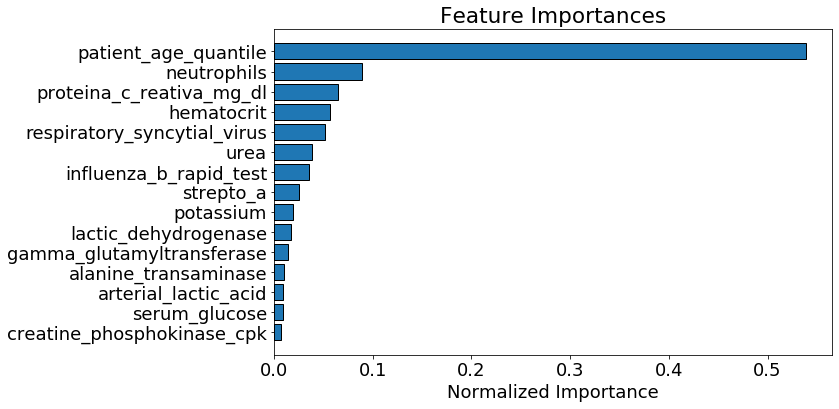

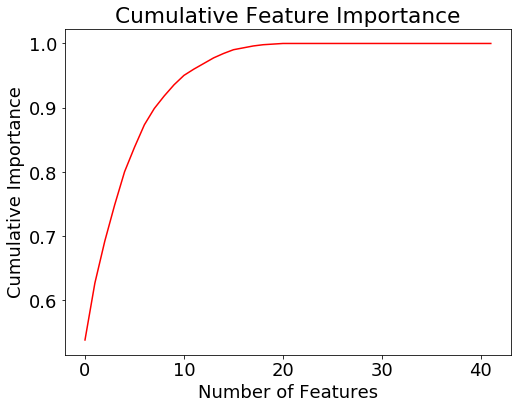

9 features required for 0.90 of cumulative importance


In [40]:
norm_feature_importances = plot_feature_importances(feature_importances)

In [41]:
#remove the features that have zero importance.
df_lgb = df_lgb.drop(columns = zero_features)
print('Dataset shape: ', df_lgb.shape)

Dataset shape:  (5644, 21)


In [42]:
#re-run the model to see if it identifies any more features with zero importance, (kind of like manual recursive feature eilmination)

def identify_zero_importance_features(train, train_labels, iterations = 2):
    """
    Identify zero importance features in a training dataset based on the 
    feature importances from a gradient boosting model. 
    
    Parameters
    --------
    train : dataframe
        Training features
        
    train_labels : np.array
        Labels for training data
        
    iterations : integer, default = 2
        Number of cross validation splits to use for determining feature importances
    """
    
    # Initialize an empty array to hold feature importances
    feature_importances = np.zeros(train.shape[1])

    # Create the model with several hyperparameters
    model = lgb.LGBMClassifier(objective='binary', boosting_type = 'goss', n_estimators = 10000, class_weight = 'balanced')
    
    # Fit the model multiple times to avoid overfitting
    for i in range(iterations):

        # Split into training and validation set
        train_features, valid_features, train_y, valid_y = train_test_split(train, train_labels, test_size = 0.25, random_state = i)

        # Train using early stopping
        model.fit(train_features, train_y, early_stopping_rounds=100, eval_set = [(valid_features, valid_y)], 
                  eval_metric = 'auc', verbose = 200)

        # Record the feature importances
        feature_importances += model.feature_importances_ / iterations
    
    feature_importances = pd.DataFrame({'feature': list(train.columns), 'importance': feature_importances}).sort_values('importance', ascending = False)
    
    # Find the features with zero importance
    zero_features = list(feature_importances[feature_importances['importance'] == 0.0]['feature'])
    print('\nThere are %d features with 0.0 importance' % len(zero_features))
    
    return zero_features, feature_importances

In [43]:
zero_features

['lipase_dosage',
 'arteiral_fio2',
 'd_dimer',
 'ferritin',
 'albumin',
 'vitamin_b12',
 'prothrombin_time_pt_activity',
 'urine_ph',
 'partial_thromboplastin_time_ptt',
 'urine_crystals',
 'urine_leukocytes',
 'urine_sugar',
 'urine_nitrite',
 'urine_ketone_bodies',
 'urine_hemoglobin',
 'urine_aspect',
 'urine_esterase',
 'fio2_venous_blood_gas_analysis',
 'magnesium',
 'mycoplasma_pneumoniae',
 'phosphor']

In [45]:
second_round_zero_features, feature_importances = identify_zero_importance_features(df_lgb, dataset_labels)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[21]	valid_0's auc: 0.644206	valid_0's binary_logloss: 0.616384
Training until validation scores don't improve for 100 rounds
[200]	valid_0's auc: 0.627722	valid_0's binary_logloss: 0.633327
Early stopping, best iteration is:
[108]	valid_0's auc: 0.640551	valid_0's binary_logloss: 0.632409

There are 0 features with 0.0 importance


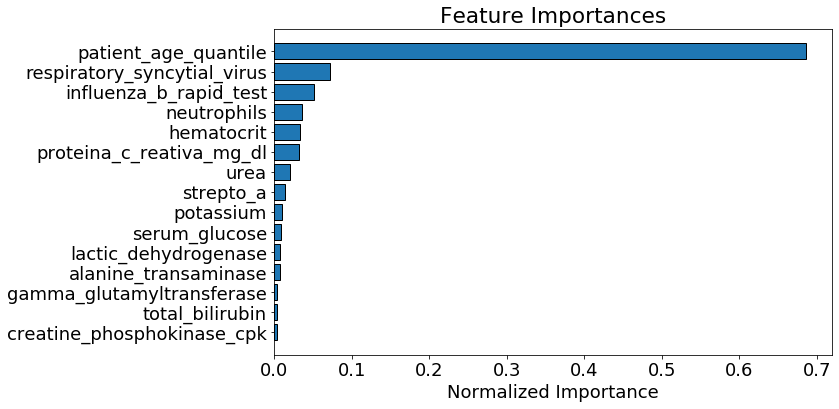

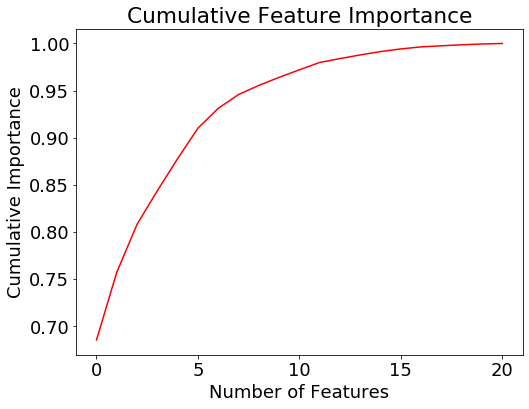

9 features required for 0.95 of cumulative importance


In [46]:
norm_feature_importances = plot_feature_importances(feature_importances, threshold = 0.95)

In [47]:
# # Threshold for cumulative importance
threshold = 0.95

# Extract the features to keep
features_to_keep = list(norm_feature_importances[norm_feature_importances['cumulative_importance'] < threshold]['feature'])
features_to_keep.append('patient_addmited_to_intensive_care_unit_1_yes_0_no')
features_to_keep.append('patient_addmited_to_regular_ward_1_yes_0_no')
features_to_keep.append('patient_addmited_to_semi_intensive_unit_1_yes_0_no')
features_to_keep.append('patient_id')
features_to_keep.append('sars_cov_2_exam_result')

        


# Create new datasets with smaller features
dataset_small = df_lgb_[features_to_keep]

dataset_small.head()
    

,patient_age_quantile,respiratory_syncytial_virus,influenza_b_rapid_test,neutrophils,hematocrit,proteina_c_reativa_mg_dl,urea,strepto_a,patient_addmited_to_intensive_care_unit_1_yes_0_no,patient_addmited_to_regular_ward_1_yes_0_no,patient_addmited_to_semi_intensive_unit_1_yes_0_no,patient_id,sars_cov_2_exam_result
0,13,0,0,-999.000000,-999.000000,-999.000000,-999.000000,0,0,0,0,1588,0
1,17,2,1,-0.619086,0.236515,-0.147895,1.198059,0,0,0,0,451,0
2,8,0,0,-999.000000,-999.000000,-999.000000,-999.000000,0,0,0,0,3669,0
3,5,0,0,-999.000000,-999.000000,-999.000000,-999.000000,0,0,0,0,5457,0
4,15,2,0,-999.000000,-999.000000,-999.000000,-999.000000,0,0,0,0,4843,0


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


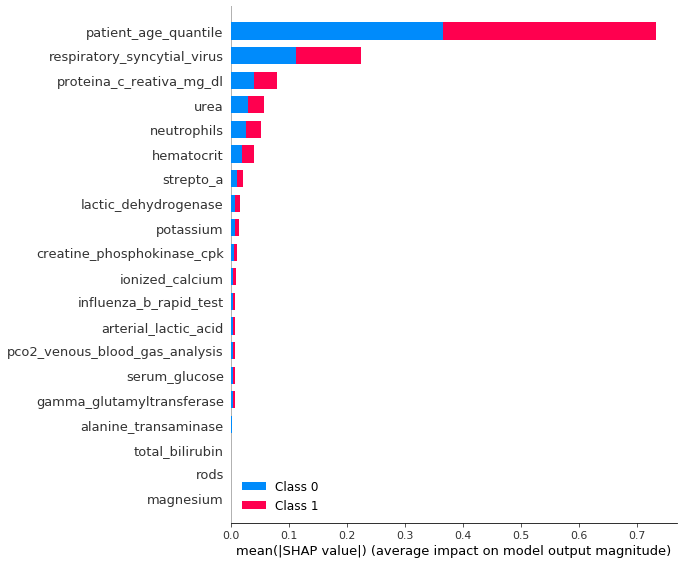

In [48]:
import shap
shap_values = shap.TreeExplainer(model).shap_values(valid_features)
shap.summary_plot(shap_values, valid_features)

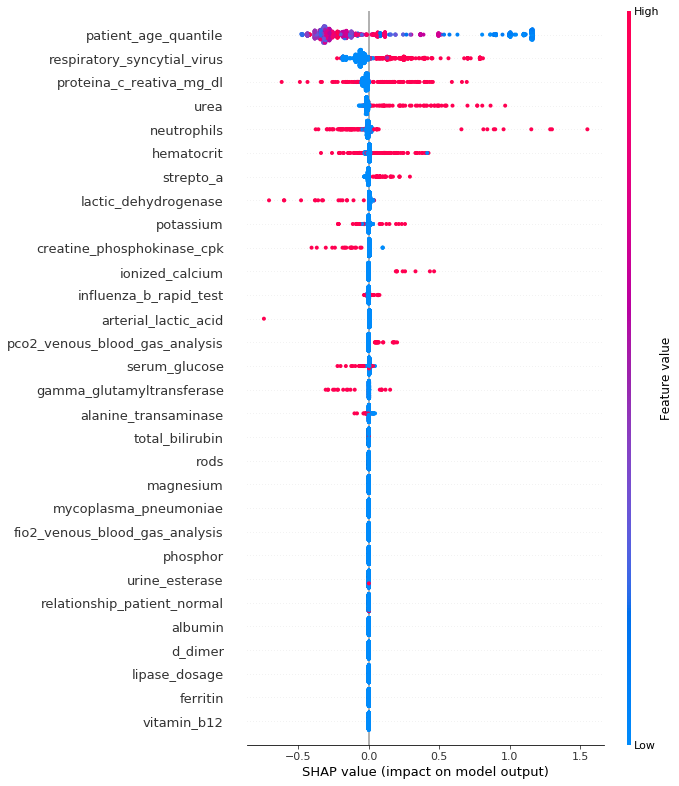

In [49]:
#summarize the effects of top features 
shap.summary_plot(shap_values[0], valid_features, max_display=30)    

In [50]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [51]:
train_df = dataset_small
features = list(train_df)
features.remove('patient_id')
features.remove('sars_cov_2_exam_result')
features.remove('patient_addmited_to_intensive_care_unit_1_yes_0_no')
features.remove('patient_addmited_to_regular_ward_1_yes_0_no')
features.remove('patient_addmited_to_semi_intensive_unit_1_yes_0_no')
target = 'sars_cov_2_exam_result'

In [52]:
# Machine Learning
from lightgbm import LGBMRegressor
#from catboost import CatBoostRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier

In [53]:
# Split Train and Validation
X_train = train_df.drop('patient_id',axis=1)
X_train = X_train.drop(['sars_cov_2_exam_result',
                        'patient_addmited_to_regular_ward_1_yes_0_no',
                        'patient_addmited_to_semi_intensive_unit_1_yes_0_no',
                        'patient_addmited_to_intensive_care_unit_1_yes_0_no'],
                       axis=1)
target = train_df['sars_cov_2_exam_result']

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  target,
                                                  test_size=0.30, 
                                                  random_state=2020, 
                                                  stratify=target)

In [54]:
#model selection
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
    ]
for classifier in classifiers:
    model = classifier.fit(X_train, y_train)
    print(classifier)
    print("model score: %.3f" % model.score(X_val, y_val))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
model score: 0.874
SVC(C=0.025, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
model score: 0.901
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
model score: 0.888
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
     

In [55]:
#looking at Random Forest Classifier alone 
rf = RandomForestClassifier(n_estimators=2000) 
rf = rf.fit(X_train, y_train) 
acc = rf.score(X_val, y_val) 
print(f"Training Data Score: {rf.score(X_train, y_train)}") 
print(f"Testing Data Score: {rf.score(X_val, y_val)}")

Training Data Score: 0.9167088607594936
Testing Data Score: 0.8990554899645808


In [56]:
#Hyperparameter optimization aka find the best set of parameters for the algorithm 
#create the GridSearchCV model
from sklearn.model_selection import GridSearchCV

param_grid = {
    'bootstrap': [True],
    'max_depth': [10,20,30],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
# grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
#                           cv = 3, n_jobs = -1, verbose = 2)
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                             n_jobs = -1, verbose = 2)


In [57]:
# Train the model with GridSearch
grid_search.fit(X_train, y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_
print(f"Training Data Score: {best_grid.score(X_train, y_train)}")
print(f"Testing Data Score: {best_grid.score(X_val, y_val)}")

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 18.1min finished


Training Data Score: 0.9045569620253164
Testing Data Score: 0.9002361275088547


In [58]:
from sklearn.metrics import classification_report

In [59]:
#use the best model to predict labels on the test set and print classification report 
y_pred_best = best_model_rf.predict(X_train)
print(classification_report(y_train, y_pred_best))

NameError: name 'best_model_rf' is not defined

# Save the Model

In [ ]:
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
# import joblib
# filename = 'best_model_rf.sav'
# joblib.dump(best_model_rf, filename)
# filename1 = 'best_model_gnb.sav'
# joblib.dump(best_model_gnb, filename1)

In [88]:
#for dash app figure 
fig_feature_importances = feature_importances[:18]
fig_feature_importances

,feature,importance
0,patient_age_quantile,1238.0
3,respiratory_syncytial_virus,130.0
8,influenza_b_rapid_test,92.0
4,neutrophils,64.5
1,hematocrit,61.5
6,proteina_c_reativa_mg_dl,58.5
5,urea,38.0
13,strepto_a,26.5
7,potassium,17.5
2,serum_glucose,15.5


In [89]:
fig_feature_importances['log10_value'] = np.log10(fig_feature_importances['importance'])



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [90]:
import plotly.graph_objects as go

fig = go.Figure(go.Bar(
            x=fig_feature_importances["log10_value"],
            y=fig_feature_importances["feature"],
            orientation='h'))
fig.update_layout(yaxis=dict(autorange="reversed"))

fig.show()